# Feature Selection & Data Preparation

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler


In [2]:
# Load cleaned datasets (if running separately)
crop_data = pd.read_csv('Crop Data.csv')
rainfall_data = pd.read_csv('Rainfall.csv')
nutrient_data = pd.read_csv('Crop Nutrient.csv')
price_data = pd.read_csv('Crop Price.csv')

##### Select Features

In [3]:
features = ['Area', 'Crop_encoded', 'Year']   # Add 'Season' if encoded numerically
target = 'Yield'

In [4]:
X = crop_data[features]
y = crop_data[target]

##### Train-Test Split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# 1. Random Forest Regressor

In [6]:
rf = RandomForestRegressor(n_estimators=150, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

print("🌱 Random Forest R2 Score:", r2_score(y_test, rf_pred))
print("🌱 Random Forest RMSE:", np.sqrt(mean_squared_error(y_test, rf_pred)))


🌱 Random Forest R2 Score: 0.6741371565288983
🌱 Random Forest RMSE: 10.093454895246325


# 2. Support Vector Regressor (SVR)

In [7]:
svr = SVR(kernel='rbf', C=100, epsilon=0.1)
svr.fit(X_train, y_train)
svr_pred = svr.predict(X_test)

print("🌾 SVR R2 Score:", r2_score(y_test, svr_pred))
print("🌾 SVR RMSE:", np.sqrt(mean_squared_error(y_test, svr_pred)))


🌾 SVR R2 Score: -0.07801696936707603
🌾 SVR RMSE: 18.358416724111173


# 3. LSTM Model
###### LSTM needs scaling & reshaping

In [8]:
# Scaling the data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


In [9]:
# Reshape for LSTM (samples, timesteps, features)
X_lstm = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))

In [10]:
# Build LSTM Model
lstm = Sequential()
lstm.add(LSTM(64, input_shape=(X_lstm.shape[1], X_lstm.shape[2])))
lstm.add(Dropout(0.2))
lstm.add(Dense(1))
lstm.compile(optimizer='adam', loss='mse')

In [11]:
# Train LSTM
lstm.fit(X_lstm, y, epochs=50, batch_size=32, verbose=1)

Epoch 1/50
3703/3703 [==============================] - 13s 3ms/step - loss: 359.2459
Epoch 2/50
3703/3703 [==============================] - 10s 3ms/step - loss: 338.1708
Epoch 3/50
3703/3703 [==============================] - 10s 3ms/step - loss: 330.4947
Epoch 4/50
3703/3703 [==============================] - 10s 3ms/step - loss: 324.9945
Epoch 5/50
3703/3703 [==============================] - 11s 3ms/step - loss: 321.7418
Epoch 6/50
3703/3703 [==============================] - 11s 3ms/step - loss: 319.2728
Epoch 7/50
3703/3703 [==============================] - 11s 3ms/step - loss: 317.3806
Epoch 8/50
3703/3703 [==============================] - 11s 3ms/step - loss: 316.6733
Epoch 9/50
3703/3703 [==============================] - 11s 3ms/step - loss: 316.1404
Epoch 10/50
3703/3703 [==============================] - 11s 3ms/step - loss: 315.6687
Epoch 11/50
3703/3703 [==============================] - 11s 3ms/step - loss: 315.0779
Epoch 12/50
3703/3703 [=============================

In [12]:
# Predict with LSTM
lstm_pred = lstm.predict(X_lstm)

print("🌿 LSTM RMSE:", np.sqrt(mean_squared_error(y, lstm_pred)))

3703/3703 [==============================] - 6s 2ms/step
🌿 LSTM RMSE: 16.510670694186096


# Final Model Comparison

In [13]:
print("\n✅ Model Performance Summary:")
print("Random Forest R2:", r2_score(y_test, rf_pred))
print("SVR R2:", r2_score(y_test, svr_pred))
print("LSTM RMSE:", np.sqrt(mean_squared_error(y, lstm_pred)))



✅ Model Performance Summary:
Random Forest R2: 0.6741371565288983
SVR R2: -0.07801696936707603
LSTM RMSE: 16.510670694186096


# Plot Random Forest Predictions

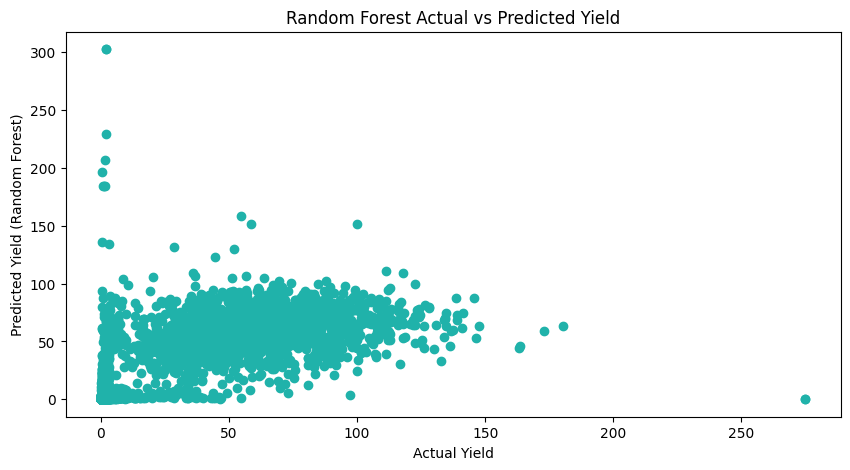

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.scatter(y_test, rf_pred, color='LightSeaGreen')
plt.xlabel('Actual Yield')
plt.ylabel('Predicted Yield (Random Forest)')
plt.title('Random Forest Actual vs Predicted Yield')
plt.show()


# Random Forest Tuning with GridSearchCV

In [15]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

In [16]:
# Random Forest Hyperparameter Grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}


In [17]:
# Initialize Random Forest
rf = RandomForestRegressor(random_state=42)

In [18]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score
import numpy as np
import time

# ✅ Random Forest Model
rf = RandomForestRegressor(random_state=42)

# ✅ Optimized Parameter Distribution (Reduced for speed)
param_dist = {
    'n_estimators': [100, 150, 200],
    'max_depth': [10, 15, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# ✅ RandomizedSearchCV with 10 iterations
random_search = RandomizedSearchCV(estimator=rf,
                                   param_distributions=param_dist,
                                   n_iter=10,          # Controls total runs (set to 10 for speed)
                                   cv=3,
                                   scoring='r2',
                                   verbose=2,
                                   n_jobs=-1,
                                   random_state=42)

# ✅ Timer to measure execution
start = time.time()

# ✅ Fitting the model
random_search.fit(X_train, y_train)

end = time.time()



Fitting 3 folds for each of 10 candidates, totalling 30 fits


In [19]:
# ✅ Output the results
print("✅ Best Parameters:", random_search.best_params_)
print("✅ Best R2 Score (Train CV):", random_search.best_score_)
print(f"✅ Total Time Taken: {(end - start) / 60:.2f} minutes")



✅ Best Parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 10}
✅ Best R2 Score (Train CV): 0.5887738976124363
✅ Total Time Taken: 3.15 minutes


In [20]:
# ✅ Predict and evaluate
best_rf = random_search.best_estimator_
y_pred = best_rf.predict(X_test)
print("✅ Random Forest R2 on Test Data:", r2_score(y_test, y_pred))


✅ Random Forest R2 on Test Data: 0.731844063964203


# Improved LSTM Model with Scaling, Dropout & EarlyStopping

In [21]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [22]:
# Scaling the features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [23]:
# Reshape for LSTM (samples, time_steps, features)
X_train_lstm = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_lstm = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))


In [24]:
# ✅ Build Optimized LSTM Model
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(1, X_train_scaled.shape[1])))
model.add(Dropout(0.2))  # Helps prevent overfitting
model.add(Dense(32, activation='relu'))
model.add(Dense(1))  # Output layer

model.compile(optimizer='adam', loss='mse')

In [25]:
# ✅ Early stopping to reduce training time
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


In [26]:
# ✅ Train the LSTM model (Updated to 50 epochs and batch size 64)
history = model.fit(
    X_train_lstm, y_train,
    validation_split=0.2,
    epochs=50,             # ✅ Changed to 50 epochs
    batch_size=64,         # ✅ Batch size remains optimized for speed
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/50
1185/1185 [==============================] - 5s 4ms/step - loss: 394.1710 - val_loss: 265.5045
Epoch 2/50
1185/1185 [==============================] - 4s 3ms/step - loss: 353.0164 - val_loss: 245.2730
Epoch 3/50
1185/1185 [==============================] - 4s 3ms/step - loss: 338.3679 - val_loss: 235.8660
Epoch 4/50
1185/1185 [==============================] - 4s 3ms/step - loss: 330.0251 - val_loss: 228.1394
Epoch 5/50
1185/1185 [==============================] - 4s 3ms/step - loss: 322.7795 - val_loss: 221.1024
Epoch 6/50
1185/1185 [==============================] - 4s 3ms/step - loss: 315.7861 - val_loss: 213.4666
Epoch 7/50
1185/1185 [==============================] - 4s 3ms/step - loss: 309.2599 - val_loss: 206.9711
Epoch 8/50
1185/1185 [==============================] - 4s 3ms/step - loss: 303.1650 - val_loss: 201.1174
Epoch 9/50
1185/1185 [==============================] - 4s 3ms/step - loss: 298.5537 - val_loss: 196.4689
Epoch 10/50
1185/1185 [=======================

In [27]:
# ✅ Predict and Evaluate
lstm_pred = model.predict(X_test_lstm).flatten()
rmse = np.sqrt(mean_squared_error(y_test, lstm_pred))
print("✅ Optimized LSTM RMSE:", rmse)

741/741 [==============================] - 1s 2ms/step
✅ Optimized LSTM RMSE: 8.247142909701294


# Model for Deployment

In [28]:
import joblib

# After Random Forest training
joblib.dump(rf, 'model/random_forest_model.pkl')
print("✅ Random Forest Model Saved!")


✅ Random Forest Model Saved!


In [29]:
# After LSTM training
model.save('model/lstm_model.h5')
print("✅ LSTM Model Saved!")


✅ LSTM Model Saved!


In [33]:
import pickle
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)  # Fit on training data

pickle.dump(scaler, open('model/scaler.pkl', 'wb'))  # Save the scaler object itself
